# 本代码用来给指定的根据指定的csv文件生成对应的特征列

## 1. 导入包

In [18]:
import numpy as np  
import pandas as pd
import math
import os
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from tqdm import tqdm
from sklearn.decomposition import PCA           #加载PCA算法包
import seaborn as sns

## 2. 加载文件

In [19]:
csv_filename = "printer_featured.csv"
csv_filename_pca = "printer_featured_pca.csv"
df = pd.read_csv(csv_filename)
df.head(5)

,time,us,acc,avg32,std32,max32,min32,med32,rms32,engy32,...,min8f,med8f,rms8f,engy8f,skw8f,krt8f,Fskw8f,Fkrt8f,Fmax8f,FmaxId8f
0,52:08.4,1012464,0.03598,0.03598,0.000000,0.03598,0.03598,0.035980,0.035980,0.001295,...,0.03598,0.035980,0.035980,0.001295,NaN,NaN,NaN,NaN,NaN,NaN
1,52:08.4,1044468,0.03342,0.03470,0.001280,0.03598,0.03342,0.034700,0.034724,0.001206,...,0.03342,0.034700,0.034724,0.001206,NaN,NaN,NaN,NaN,NaN,NaN
2,52:08.4,1076472,0.03821,0.03587,0.001957,0.03821,0.03342,0.035980,0.035923,0.001290,...,0.03342,0.035980,0.035923,0.001290,-0.206082,NaN,[nan],[nan],0.000000,0.0
3,52:08.5,1108476,0.03703,0.03616,0.001768,0.03821,0.03342,0.036505,0.036203,0.001311,...,0.03342,0.036505,0.036203,0.001311,-0.886037,0.824385,NaN,NaN,NaN,NaN
4,52:08.5,1140476,0.03831,0.03659,0.001800,0.03831,0.03342,0.037030,0.036634,0.001342,...,0.03342,0.037030,0.036634,0.001342,-1.158537,0.903630,[nan],[nan],0.002122,0.5


## 3. 处理文件

In [20]:
"""
n_components:
意义：PCA算法中所要保留的主成分个数n，也即保留下来的特征个数n
类型：int 或者 string，缺省时默认为None，所有成分被保留。
赋值为int，比如n_components=1，将把原始数据降到一个维度。
赋值为string，比如n_components='mle'，将自动选取特征个数n，使得满足所要求的方差百分比。

copy:
类型：bool，True或者False，缺省时默认为True。
意义：表示是否在运行算法时，将原始训练数据复制一份。若为True，则运行PCA算法后，原始训练数据的值不会有任何改变，因为是在原始数据的副本上进行运算；若为False，则运行PCA算法后，原始训练数据的 值会改，因为是在原始数据上进行降维计算。

whiten:
类型：bool，缺省时默认为False
意义：白化，使得每个特征具有相同的方差。

components_：返回具有最大方差的成分。
explained_variance_ratio_：返回 所保留的n个成分各自的方差百分比。
n_components_：返回所保留的成分个数n。
"""

pca=PCA(n_components=2)     #加载PCA算法，设置降维后主成分数目为2
X = df[['avg32','std32',"max32","min32"]]  #选择表格中的'w'、'z'列
reduced_X=pca.fit_transform(X)#对样本进行降维
pca.components_
pca.explained_variance_ratio_
pca.n_components_
reduced_X

array([[-0.02645402,  0.00555427],
       [-0.02527457,  0.00300357],
       [-0.02306549,  0.00382474],
       ...,
       [-0.02041657,  0.00506812],
       [-0.02041035,  0.00506122],
       [-0.0204128 ,  0.00505957]])

## 4. 可视化

#### 查看PCA的成分比例

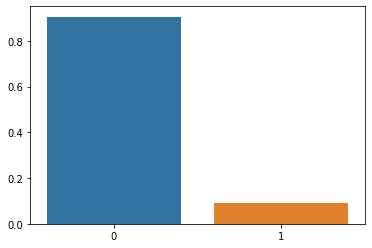

In [21]:
sns.barplot(x=np.array(range(pca.n_components_)),y=pca.explained_variance_ratio_)

#### 把PCA结果的前两列绘制出来

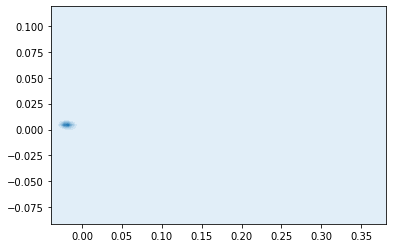

In [22]:
sns.kdeplot(reduced_X[:,0],reduced_X[:,1],shade=True)

## 5. 把PCA[0]和PCA[1]赋值到CSV文件里

In [23]:
df["pca0"] = reduced_X[:,0]
df["pca1"] = reduced_X[:,1]

## 4. 保存文件

In [25]:
## index=0,去掉索引列
df.to_csv(csv_filename_pca,float_format='%.6f',index=0)

In [26]:
df.head(5)

,time,us,acc,avg32,std32,max32,min32,med32,rms32,engy32,...,rms8f,engy8f,skw8f,krt8f,Fskw8f,Fkrt8f,Fmax8f,FmaxId8f,pca0,pca1
0,52:08.4,1012464,0.03598,0.03598,0.000000,0.03598,0.03598,0.035980,0.035980,0.001295,...,0.035980,0.001295,NaN,NaN,NaN,NaN,NaN,NaN,-0.026454,0.005554
1,52:08.4,1044468,0.03342,0.03470,0.001280,0.03598,0.03342,0.034700,0.034724,0.001206,...,0.034724,0.001206,NaN,NaN,NaN,NaN,NaN,NaN,-0.025275,0.003004
2,52:08.4,1076472,0.03821,0.03587,0.001957,0.03821,0.03342,0.035980,0.035923,0.001290,...,0.035923,0.001290,-0.206082,NaN,[nan],[nan],0.000000,0.0,-0.023065,0.003825
3,52:08.5,1108476,0.03703,0.03616,0.001768,0.03821,0.03342,0.036505,0.036203,0.001311,...,0.036203,0.001311,-0.886037,0.824385,NaN,NaN,NaN,NaN,-0.023099,0.003864
4,52:08.5,1140476,0.03831,0.03659,0.001800,0.03831,0.03342,0.037030,0.036634,0.001342,...,0.036634,0.001342,-1.158537,0.903630,[nan],[nan],0.002122,0.5,-0.022986,0.003912
